# Explore here

In [1]:
import pandas as pd

# Load the data
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Display first few rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check the structure of the dataset
data.info()

# Check summary statistics for the features
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize model
model = LogisticRegression(max_iter=1000)

# Cross-validation on raw data
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print(f"Baseline model performance (cross-validation): {cv_scores.mean():.4f}")

Baseline model performance (cross-validation): 0.7655


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              B

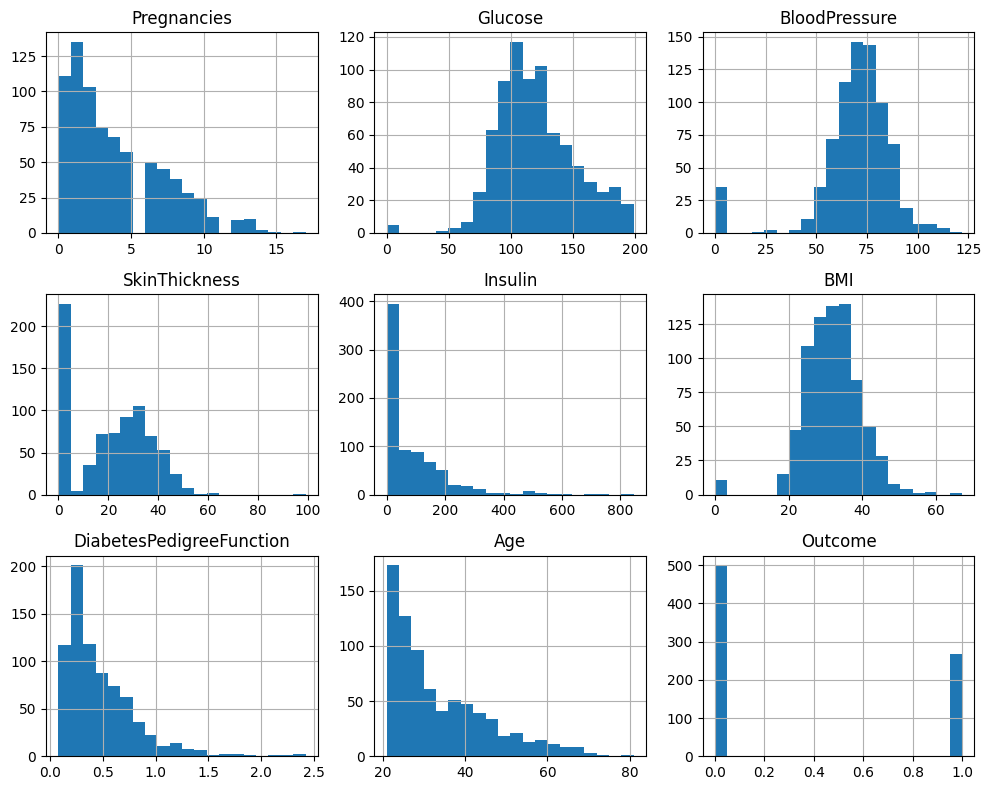

In [7]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Descriptive statistics for the features
print(data.describe())

# Plot histograms for each feature
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [8]:
# Example of handling missing data by imputation (if needed)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Check for outliers (using Z-score for example)
from scipy.stats import zscore

z_scores = zscore(X_train_imputed)
print("Z-scores for the first few rows:\n", z_scores[:5])

Z-scores for the first few rows:
 [[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


In [15]:
# Count the number of zeros in each column
zero_counts = (data == 0).sum()

# Print the columns where the count of zeros is greater than 0
print(zero_counts[zero_counts > 0])

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [16]:
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
import numpy as np

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

data[cols_to_replace] = data[cols_to_replace].fillna(data[cols_to_replace].median())

In [19]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

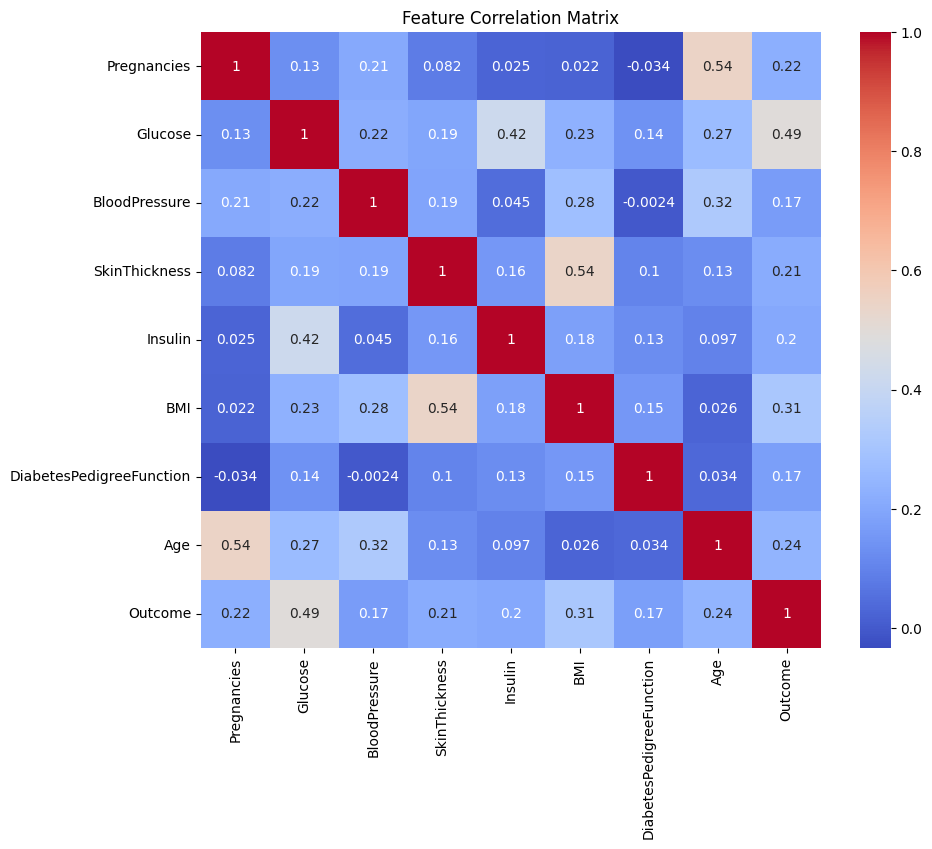

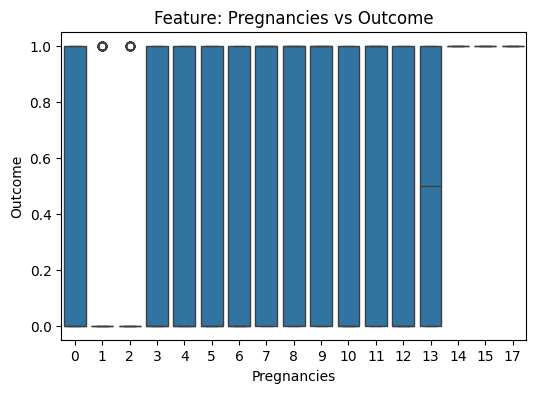

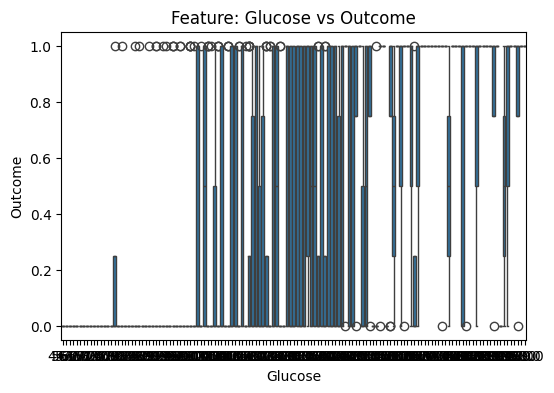

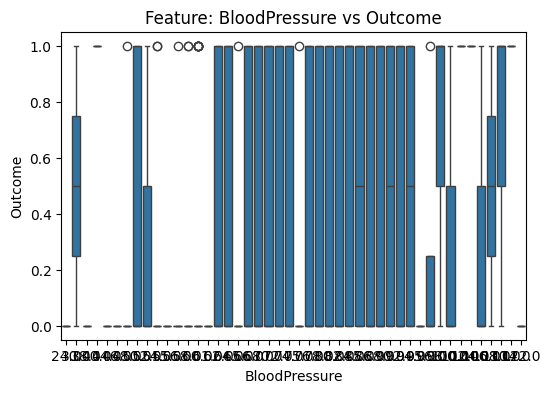

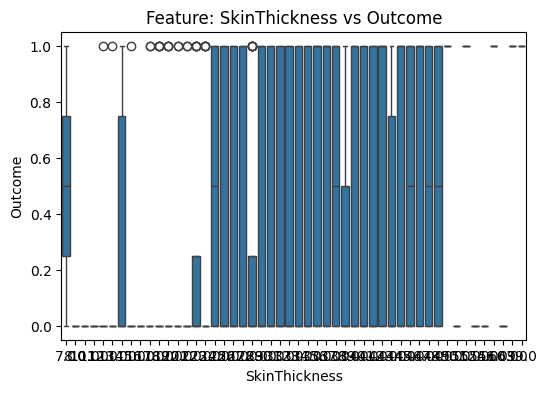

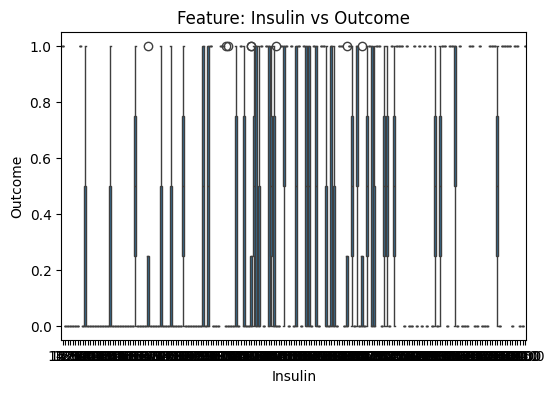

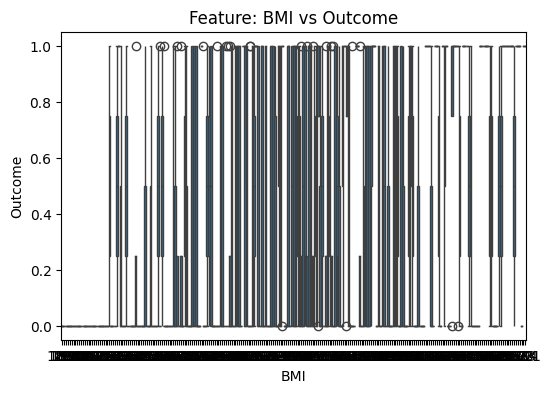

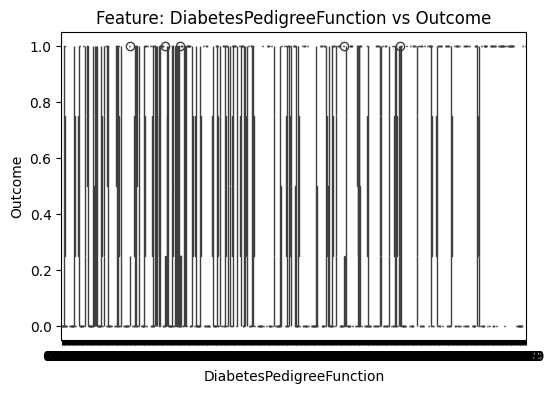

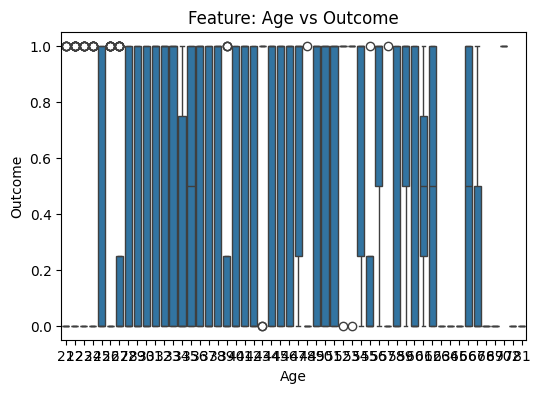

In [20]:
import seaborn as sns

# Plot pairwise correlation
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Plot relationship between each feature and target variable
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column], y=data['Outcome'])
    plt.title(f"Feature: {column} vs Outcome")
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model (using RandomForest as an example)
model_rf = RandomForestClassifier(random_state=42)

# Cross-validation on the cleaned data
cv_scores_rf = cross_val_score(model_rf, X_train_imputed, y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print(f"Random Forest Model Performance: {cv_scores_rf.mean():.4f}")

Random Forest Model Performance: 0.7721


In [22]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the optimized model on the test set
optimized_model = grid_search.best_estimator_
test_accuracy = optimized_model.score(X_test_imputed, y_test)
print(f"Test Set Accuracy (Optimized Model): {test_accuracy:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Accuracy (Optimized Model): 0.7338
